In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3

In [8]:
train_datagen=ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip=True,
    rotation_range = 10,
    
)
train_generator =train_datagen.flow_from_directory(
    'dataset/train',
    target_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'sparse',
)

Found 11203 images belonging to 10 classes.


In [34]:
class_names = list(train_generator.class_indices.keys())
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [10]:
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.6058223  0.55484194 0.5234694 ]
  [0.62638634 0.57540596 0.5440334 ]
  [0.63429004 0.58330965 0.5519371 ]
  ...
  [0.64138377 0.5864818  0.5511877 ]
  [0.6441612  0.58925927 0.55396515]
  [0.6469387  0.5920367  0.5567426 ]]

 [[0.6044336  0.5534532  0.52208066]
  [0.6252291  0.57424873 0.5428761 ]
  [0.6340586  0.5830782  0.55170566]
  ...
  [0.56528974 0.5103878  0.47509363]
  [0.5564944  0.50159246 0.46629837]
  [0.54769915 0.4927972  0.45750308]]

 [[0.60304487 0.5520645  0.52069193]
  [0.62407184 0.57309145 0.5417189 ]
  [0.63382715 0.58284676 0.5514742 ]
  ...
  [0.5711685  0.5162665  0.48097238]
  [0.57695484 0.5220529  0.48675874]
  [0.5827412  0.52783924 0.49254513]]

 ...

 [[0.6303685  0.5793881  0.54801553]
  [0.630137   0.57915664 0.5477841 ]
  [0.6299056  0.5789252  0.54755265]
  ...
  [0.6367899  0.58188796 0.5309076 ]
  [0.5743432  0.51944125 0.4684608 ]
  [0.5241989  0.469297   0.41831657]]

 [[0.6284483  0.5774679  0.5460953 ]
  [0.62867975 0.57769936 0.5463268 ]


In [11]:
validation_datagen=ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip=True,
    rotation_range = 10,
    
)
validation_generator = validation_datagen.flow_from_directory(
    'dataset/val',
    target_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'sparse',
)

Found 1597 images belonging to 10 classes.


In [12]:
test_datagen=ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip=True,
    rotation_range = 10,
    
)
test_generator = test_datagen.flow_from_directory(
    'dataset/test',
    target_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'sparse',
)

Found 3211 images belonging to 10 classes.


In [18]:
input_shape=(IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 10
model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32,kernel_size  = (3,3),activation="relu"),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,kernel_size  = (3,3),activation="relu"),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,kernel_size  = (3,3),activation="relu"),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation = "relu"),
    layers.Dense(n_classes,activation = "softmax"),
    
])

In [19]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 278,346 (1.06 MB)

 Trainable params: 278,346 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(
    optimizer = "adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ["accuracy"]
)

In [22]:
1597 /32

49.90625

In [25]:
history = model.fit(
    train_generator,
    steps_per_epoch = 350,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data = validation_generator,
    validation_steps = 49,
    epochs = 20
    
)

C:\Users\annla\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 519s 1s/step - accuracy: 0.3005 - loss: 1.9289 - val_accuracy: 0.6371 - val_loss: 1.0768
Epoch 2/20
  1/350 ━━━━━━━━━━━━━━━━━━━━ 3:50 659ms/step - accuracy: 0.6875 - loss: 1.2568

C:\Users\annla\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


350/350 ━━━━━━━━━━━━━━━━━━━━ 25s 71ms/step - accuracy: 0.6875 - loss: 1.2568 - val_accuracy: 0.6582 - val_loss: 1.0471
Epoch 3/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 350s 999ms/step - accuracy: 0.7293 - loss: 0.7983 - val_accuracy: 0.7557 - val_loss: 0.7358
Epoch 4/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 27s 74ms/step - accuracy: 0.6250 - loss: 1.1566 - val_accuracy: 0.7876 - val_loss: 0.6679
Epoch 5/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 345s 986ms/step - accuracy: 0.8373 - loss: 0.4850 - val_accuracy: 0.8648 - val_loss: 0.3829
Epoch 6/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 26s 72ms/step - accuracy: 0.8438 - loss: 0.3888 - val_accuracy: 0.8731 - val_loss: 0.3504
Epoch 7/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 340s 971ms/step - accuracy: 0.8811 - loss: 0.3501 - val_accuracy: 0.8744 - val_loss: 0.3491
Epoch 8/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 27s 75ms/step - accuracy: 0.9688 - loss: 0.1522 - val_accuracy: 0.8865 - val_loss: 0.3311
Epoch 9/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 321s 916ms/step - accuracy: 0.8898 - loss: 0.3184 - val

In [26]:
scores = model.evaluate(test_generator)

101/101 ━━━━━━━━━━━━━━━━━━━━ 56s 552ms/step - accuracy: 0.9295 - loss: 0.2332


In [27]:
type(history.history['loss'])

list

In [28]:
history.history['loss'][:5] # show loss for first 5 epochs

[1.5774385929107666,
 1.25678551197052,
 0.6958338618278503,
 1.1565890312194824,
 0.46807822585105896]

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [30]:
val_acc

[0.637117326259613,
 0.6581632494926453,
 0.7557398080825806,
 0.7876275777816772,
 0.8647959232330322,
 0.8730867505073547,
 0.8743622303009033,
 0.8864796161651611,
 0.9151785969734192,
 0.9113520383834839,
 0.9221938848495483,
 0.9292091727256775,
 0.925382673740387,
 0.9285714030265808,
 0.9139030575752258,
 0.9272959232330322,
 0.9145408272743225,
 0.9164540767669678,
 0.9349489808082581,
 0.9419642686843872]

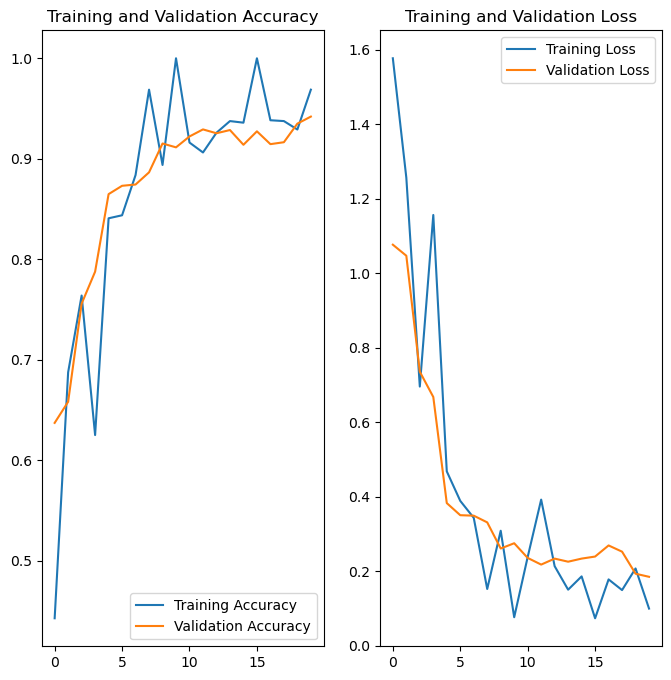

In [31]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Tomato_healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
predicted label: Tomato_healthy


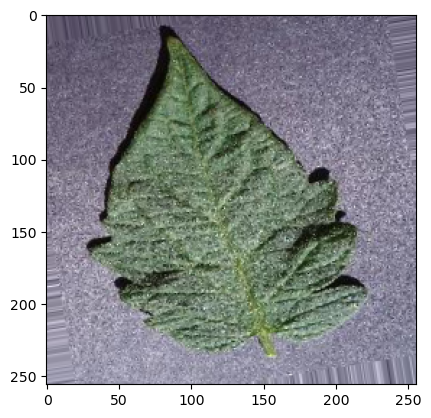

In [37]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [38]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


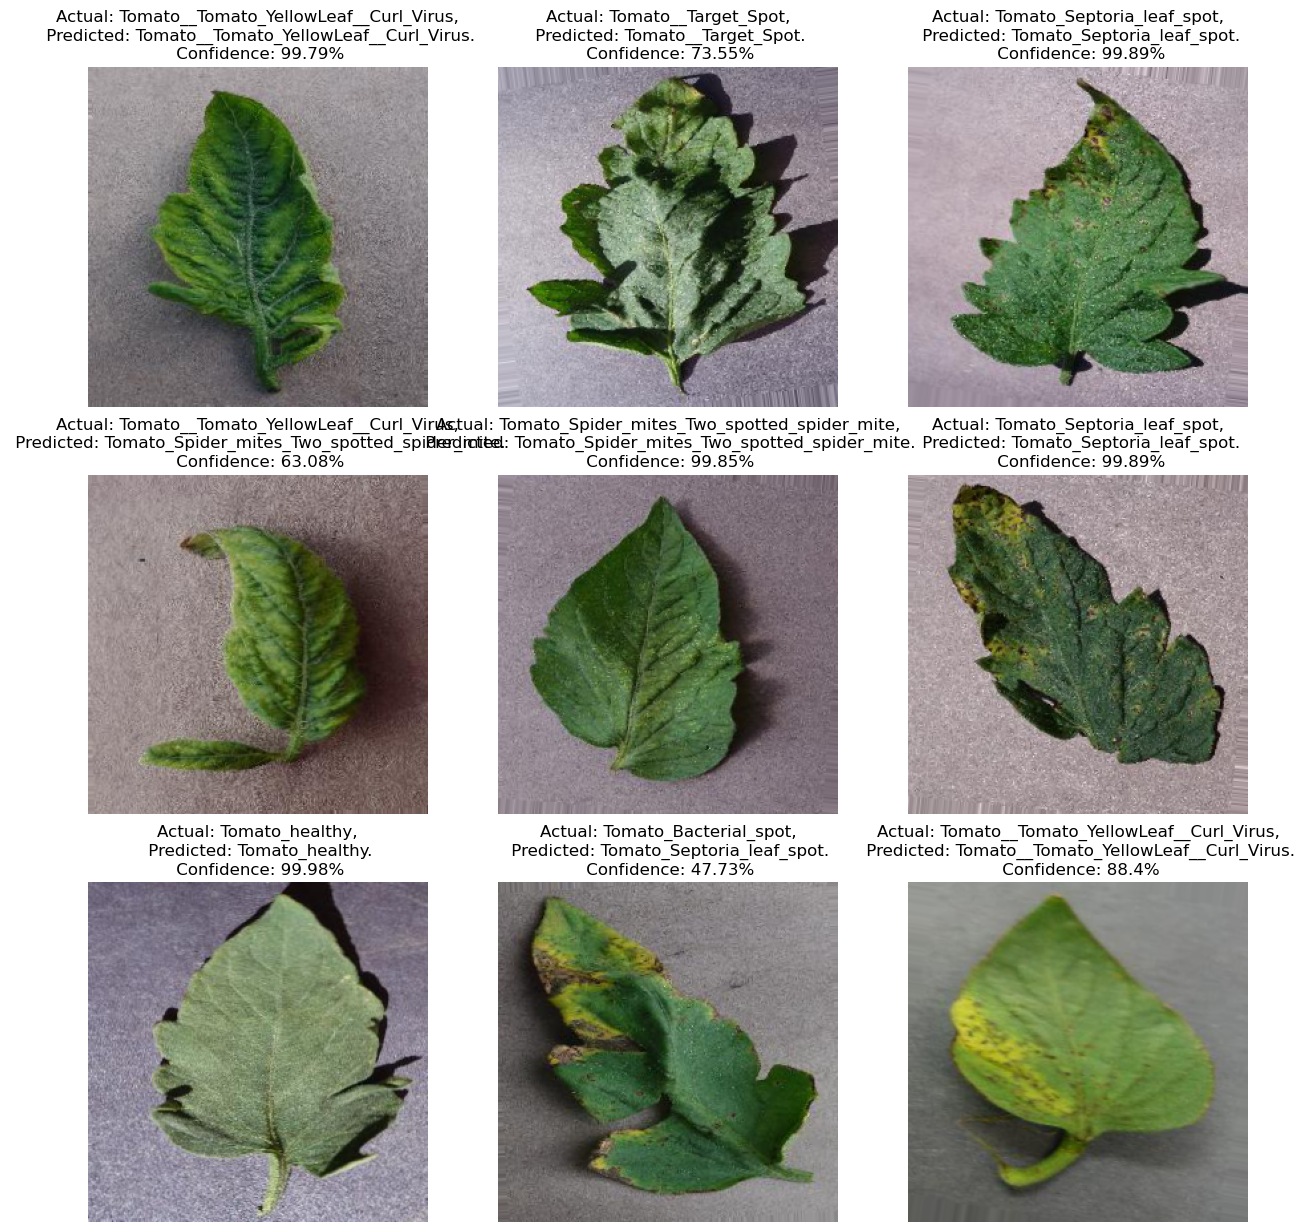

In [39]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [40]:
model.save("../tomatoes.h5")